Matrice de distances:
 [[ 0.         29.97824778 20.81154131 ... 42.65171395 25.36060297
  34.7758688 ]
 [29.97824778  0.         63.4390005  ... 53.78549236 68.76783507
  54.53056076]
 [20.81154131 63.4390005   0.         ... 73.4629775  60.39353113
  65.15335819]
 ...
 [42.65171395 53.78549236 73.4629775  ...  0.          6.77852862
  46.31438821]
 [25.36060297 68.76783507 60.39353113 ...  6.77852862  0.
  45.57492703]
 [34.7758688  54.53056076 65.15335819 ... 46.31438821 45.57492703
   0.        ]]


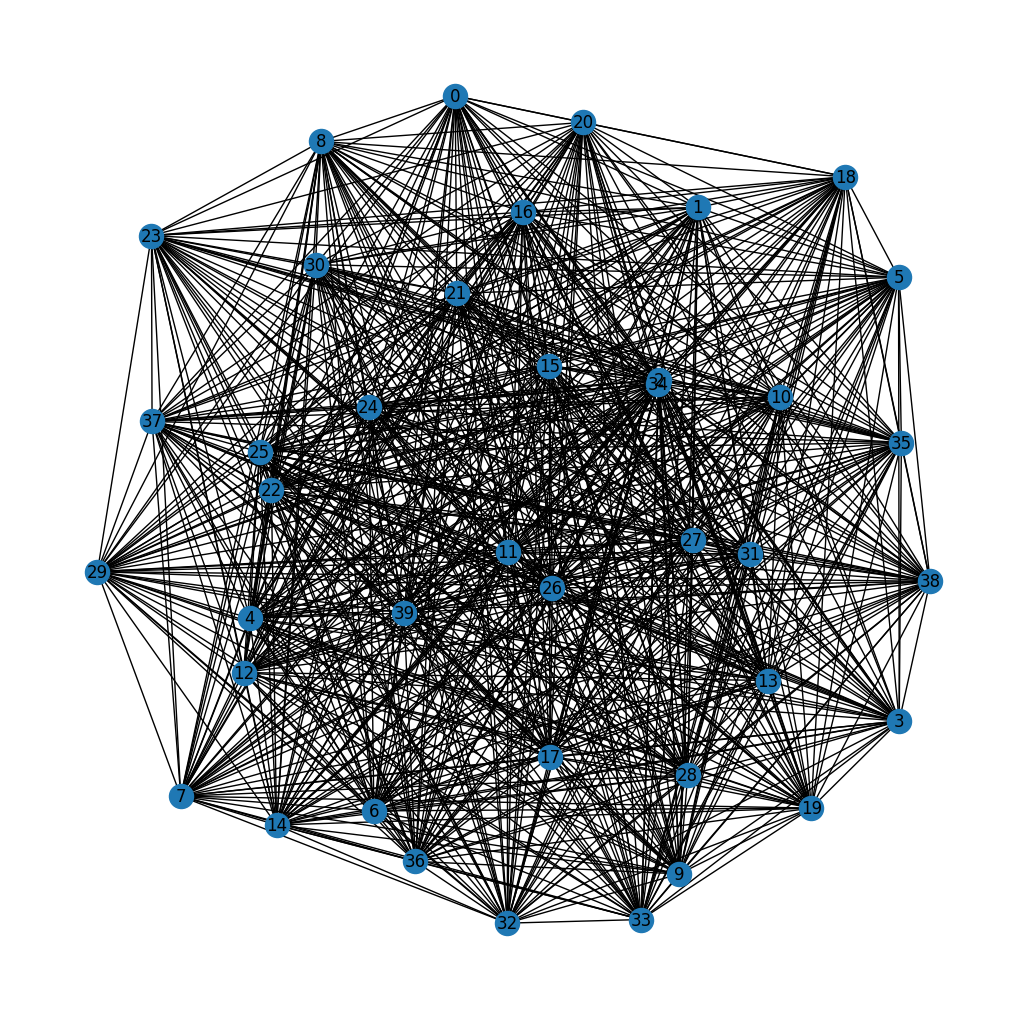

Aucune solution valide trouvée.
Meilleure solution trouvée: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Distance totale: inf
Temps d'exécution: 31.706094980239868


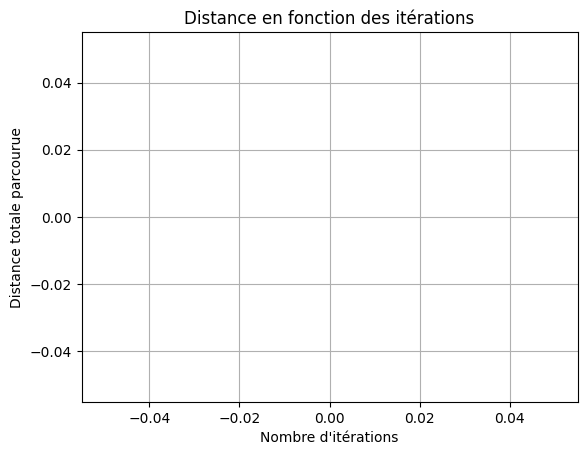

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
import time


cities_count = 40 

# Générer une matrice de distances symétrique
mat = np.random.random((cities_count, cities_count))
mat = mat + mat.T
np.fill_diagonal(mat, 0)

# Ajuster les valeurs pour simuler des distances
adj_matrix = mat * cities_count

# Afficher la matrice de distances
print("Matrice de distances:\n", adj_matrix)

# Créer un graphe aléatoire à partir de la matrice de distances
G = nx.from_numpy_array(adj_matrix)

# Calculer la mise en page
pos = nx.spring_layout(G)

# Afficher le graphe
fig, ax = plt.subplots(1, 1, figsize=(13, 13))
nx.draw(G, pos, with_labels=True, ax=ax)
plt.show()

# Fonctions utilitaires
def generate_initial_population(n_bees, n_dim):
    return [random.sample(range(n_dim), n_dim) for _ in range(n_bees)]

def evaluate_solution(solution, distance_matrix):
    distance = sum(distance_matrix[solution[i]][solution[i+1]] for i in range(len(solution) - 1))
    distance += distance_matrix[solution[-1]][solution[0]]  # Ajouter la distance du retour au point de départ
    return distance

def local_search(solution, distance_matrix, n_local_search):
    new_solutions = []
    for _ in range(n_local_search):
        new_solution = solution[:]
        i, j = random.sample(range(len(solution)), 2)
        new_solution[i], new_solution[j] = new_solution[j], new_solution[i]
        new_solutions.append(new_solution)
    return new_solutions

def calculate_distance(solution, distance_matrix):
    return evaluate_solution(solution, distance_matrix)

def calculate_time(distance, speed):
    return distance / speed

def is_valid_solution(solution, distance_matrix, max_distance, max_time, speed):
    distance = calculate_distance(solution, distance_matrix)
    time = calculate_time(distance, speed)
    return distance <= max_distance and time <= max_time

# Algorithme d'abeilles
def bee_algorithm(distance_matrix, n_bees, n_dim, n_elite, n_local_search, n_iterations, max_distance, max_time, speed):
    population = generate_initial_population(n_bees, n_dim)
    best_solution = None
    best_fitness = float('inf')
    fitness_over_time = []

    for iteration in range(n_iterations):
        # Évaluation
        fitness = np.array([evaluate_solution(sol, distance_matrix) for sol in population])
        
        # Sélection des éclaireuses
        elite_bees_idx = fitness.argsort()[:n_elite]
        elite_bees = [population[idx] for idx in elite_bees_idx]
        
        # Exploration locale
        new_population = elite_bees.copy()
        for elite_bee in elite_bees:
            new_solutions = local_search(elite_bee, distance_matrix, n_local_search)
            new_population.extend(new_solutions)
        
        # Abandon des mauvaises solutions et ajout de nouvelles solutions aléatoires
        if len(new_population) < n_bees:
            new_population.extend(generate_initial_population(n_bees - len(new_population), n_dim))
        
        # Limiter la population totale à n_bees
        population = new_population[:n_bees]
        
        # Recherche de la meilleure solution
        for sol in population:
            sol_fitness = evaluate_solution(sol, distance_matrix)
            if sol_fitness < best_fitness and is_valid_solution(sol, distance_matrix, max_distance, max_time, speed):
                best_fitness = sol_fitness
                best_solution = sol
        
        # Enregistrer la meilleure distance à chaque itération
        fitness_over_time.append(best_fitness)
    
    if best_solution is not None:
        best_solution.append(best_solution[0])  # Ajouter le retour au point de départ à la solution finale
    else:
        print("Aucune solution valide trouvée.")
        best_solution = [0] * (n_dim + 1)  # Placeholder solution

    return best_solution, best_fitness, fitness_over_time

# Paramètres de l'algorithme d'abeilles
n_bees = 1000
n_elite = 5
n_local_search = 3
n_iterations = 1000
max_distance = 200  # Contrainte de distance maximale
max_time = 8
speed = 50

# Mesurer le temps d'exécution
start_time = time.time()

# Exécuter l'algorithme avec les paramètres spécifiés
best_solution, best_fitness, fitness_over_time = bee_algorithm(
    adj_matrix,
    n_bees=n_bees,
    n_dim=cities_count,
    n_elite=n_elite,
    n_local_search=n_local_search,
    n_iterations=n_iterations,
    max_distance=max_distance,
    max_time=max_time,
    speed=speed
)

end_time = time.time()

print("Meilleure solution trouvée:", best_solution)
print("Distance totale:", best_fitness)
print("Temps d'exécution:", end_time - start_time)

# Afficher la distance en fonction des itérations
plt.plot(fitness_over_time)
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Distance totale parcourue')
plt.title('Distance en fonction des itérations')
plt.grid(True)
plt.show()